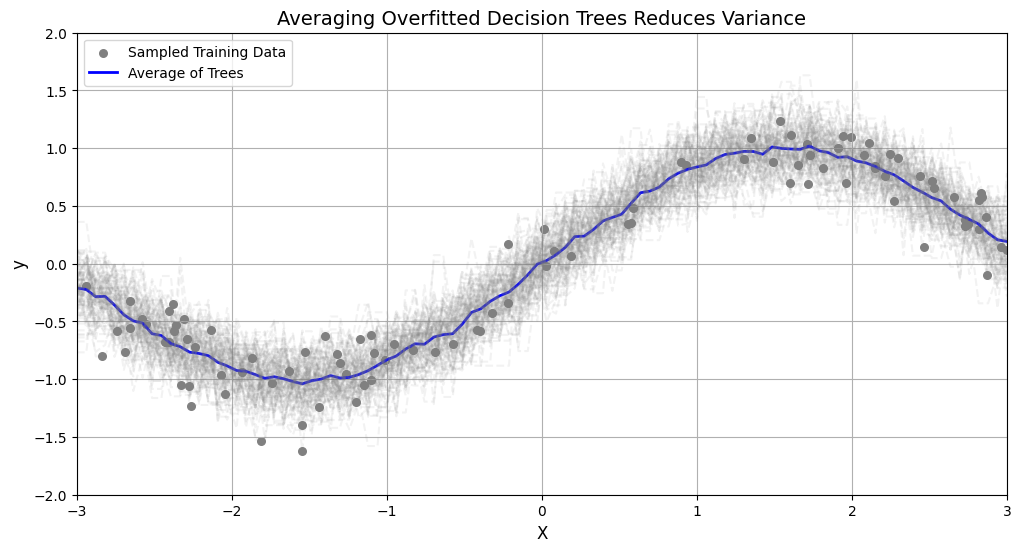

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import matplotlib.animation as animation

def train_tree(X, y):
    tree = DecisionTreeRegressor()
    tree.fit(X, y)
    return tree

def average_predictions(models, X):
    preds = np.array([model.predict(X) for model in models])
    return preds.mean(axis=0)

fig, ax = plt.subplots(figsize=(12, 6))
X_grid = np.linspace(-3, 3, 100).reshape(-1, 1) 

scatter = ax.scatter([], [], color="gray", label="Sampled Training Data", s=30)
line_avg, = ax.plot([], [], color="blue", linewidth=2, label="Average of Trees") 
lines_trees = [] 

ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)
ax.set_title("Averaging Overfitted Decision Trees Reduces Variance", fontsize=14)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

models = []
def update(frame):
    if frame < 100:
        X_new = np.random.uniform(-3, 3, size=(100, 1))
        y_new = np.sin(X_new).ravel() + 0.2 * np.random.randn(100)  # Noisy target values
        tree = train_tree(X_new, y_new)
        models.append(tree)
        y_tree_pred = tree.predict(X_grid)
        for line in lines_trees:
            line.remove()

        line_tree, = ax.plot(X_grid, y_tree_pred, linestyle="--", alpha=1)
        lines_trees.clear()
        lines_trees.append(line_tree)
        scatter.set_offsets(np.column_stack([X_new, y_new]))

    if frame == 100:
        for line in lines_trees:
            line.remove()
        lines_trees.clear()
        for tree in models:
            y_tree_pred = tree.predict(X_grid)
            ax.plot(X_grid, y_tree_pred, linestyle="--", alpha=0.1, color='gray')
    if frame > 100:
        y_avg_pred = average_predictions(models, X_grid)
        line_avg.set_data(X_grid, y_avg_pred)
    return lines_trees + [line_avg]

ani = animation.FuncAnimation(fig, update, frames=np.arange(1, 151, 1), interval=100, repeat=False)
ani.save('1.mp4', writer='ffmpeg', fps=10, dpi=300)

plt.show()


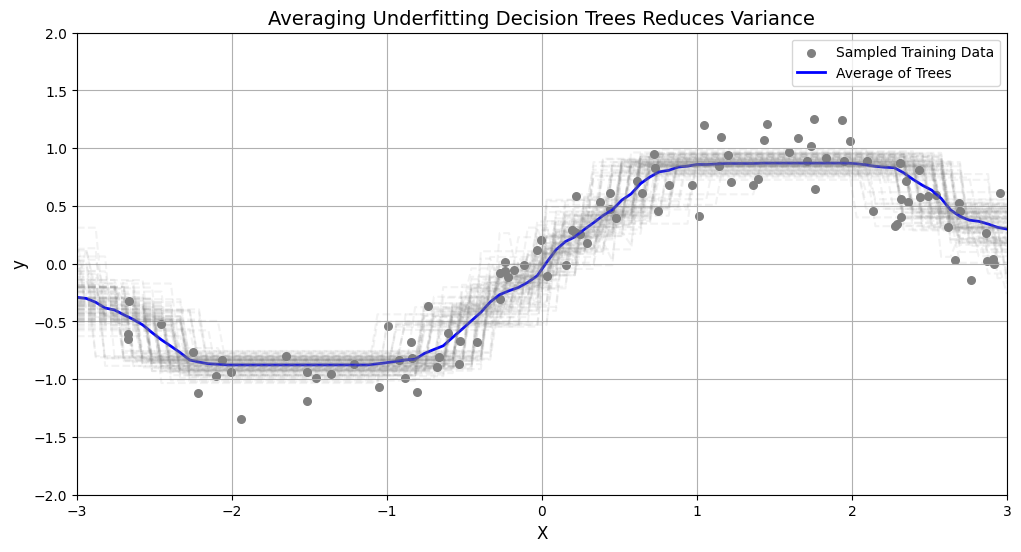

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import matplotlib.animation as animation

def train_tree(X, y):
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(X, y)
    return tree

def average_predictions(models, X):
    preds = np.array([model.predict(X) for model in models])
    return preds.mean(axis=0)

fig, ax = plt.subplots(figsize=(12, 6))
X_grid = np.linspace(-3, 3, 100).reshape(-1, 1) 

scatter = ax.scatter([], [], color="gray", label="Sampled Training Data", s=30)
line_avg, = ax.plot([], [], color="blue", linewidth=2, label="Average of Trees") 
lines_trees = [] 

ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)
ax.set_title("Averaging Underfitting Decision Trees Reduces Variance", fontsize=14)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

models = []
def update(frame):
    if frame < 100:
        X_new = np.random.uniform(-3, 3, size=(100, 1))
        y_new = np.sin(X_new).ravel() + 0.2 * np.random.randn(100)  # Noisy target values
        tree = train_tree(X_new, y_new)
        models.append(tree)
        y_tree_pred = tree.predict(X_grid)
        for line in lines_trees:
            line.remove()

        line_tree, = ax.plot(X_grid, y_tree_pred, linestyle="--", alpha=1)
        lines_trees.clear()
        lines_trees.append(line_tree)
        scatter.set_offsets(np.column_stack([X_new, y_new]))

    if frame == 100:
        for line in lines_trees:
            line.remove()
        lines_trees.clear()
        for tree in models:
            y_tree_pred = tree.predict(X_grid)
            ax.plot(X_grid, y_tree_pred, linestyle="--", alpha=0.1, color='gray')
    if frame > 100:
        y_avg_pred = average_predictions(models, X_grid)
        line_avg.set_data(X_grid, y_avg_pred)
    return lines_trees + [line_avg]

ani = animation.FuncAnimation(fig, update, frames=np.arange(1, 151, 1), interval=100, repeat=False)
ani.save('2.mp4', writer='ffmpeg', fps=10, dpi=300)

plt.show()
